# 🧠 Smile Scan Preprocessing
Notebook ini memuat tahapan awal: persiapan, konfigurasi, load gambar, dan preprocessing.

In [10]:

import cv2
import os
import matplotlib.pyplot as plt

print("Library berhasil di-import!")


Library berhasil di-import!


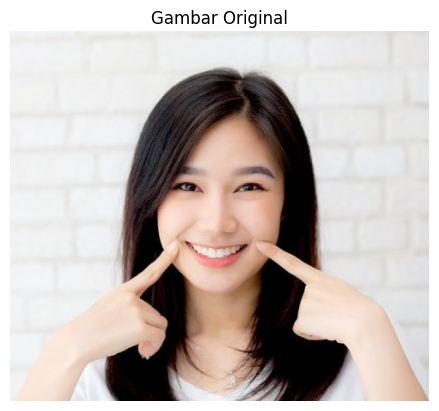

In [11]:

# Pastikan gambar bernama 'smile.jpg' ada di direktori yang sama
img_path = 'smile.jpg'
if not os.path.exists(img_path):
    raise FileNotFoundError("Gambar tidak ditemukan. Harap letakkan 'smile.jpg' di folder ini.")

img = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.title("Gambar Original")
plt.axis("off")
plt.show()


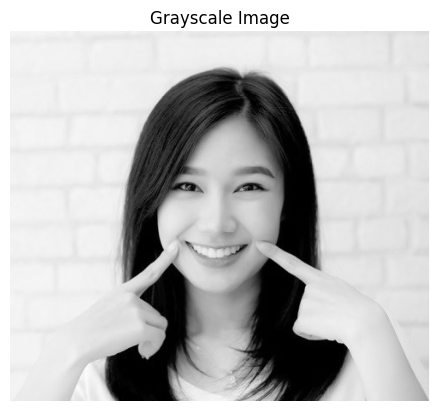

In [12]:

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(gray, cmap='gray')
plt.title("Grayscale Image")
plt.axis("off")
plt.show()


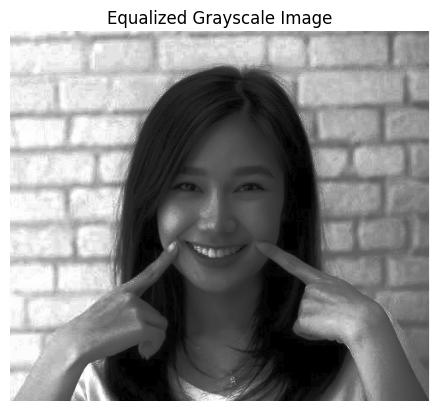

In [13]:
equalized = cv2.equalizeHist(gray)

plt.imshow(equalized, cmap='gray')
plt.title("Equalized Grayscale Image")
plt.axis("off")
plt.show()

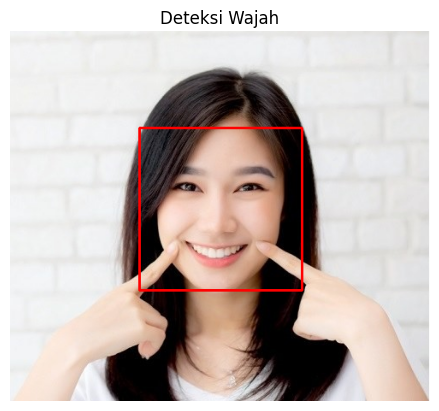

In [14]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)

# Menampilkan hasil deteksi
for (x, y, w, h) in faces:
    cv2.rectangle(img_rgb, (x, y), (x + w, y + h), (255, 0, 0), 2)

plt.imshow(img_rgb)
plt.title("Deteksi Wajah")
plt.axis("off")
plt.show()

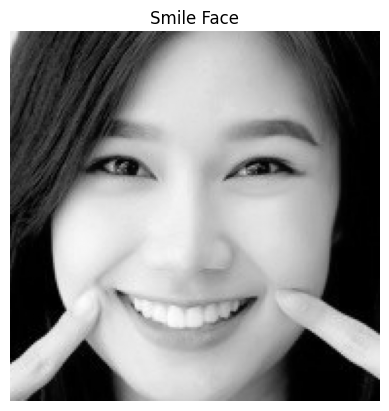

In [15]:
if len(faces) > 0:
    x, y, w, h = faces[0]  # Ambil wajah pertama
    face_img = gray[y:y+h, x:x+w]
    
    plt.imshow(face_img, cmap='gray')
    plt.title("Smile Face")
    plt.axis("off")
    plt.show()
else:
    print("Wajah tidak terdeteksi.")